# 앙상블 학습 - 앙상블 학습 개요
---

앙상블 학습을 통한 분류는 여러 개의분류기를 생성하고 그 예측을 결합함으로써 보다 정확한 최종 에측을 도출하는 기법을 말한다.  




## 앙상블의 유형
---
- 앙상블의 유형은 빌잔 적으로 보팅, 배깅 부스팅으로 구분할 수 있으며, 이외에 스태킹 등의 기법이 있다.  
- **대표적인 배깅은 랜덤 포레스트알고리즘이 있으며, 부스팅은 에이다 부스팅, 그래디언트 부스팅, XGBoost, LightGBM 등이 있다.**
- 정형 데이터의 분류나 회귀에서는 GMB 부스팅 계열의 앙상블이 전반적으로 높은 예측 성능을 나타낸다.
- 넓은 의미로는 서로 다른 모델을 결합한 것들을 앙상블로 지칭하기도 한다.

## 앙상블의 특징
---
- 단일 모델의 약점을 다수의 모델들을 결합하여 보완
- 뛰어난 성능을 가진 모델들로만 구성한느 것보다 성능이 떨어지더라도 서로 다른 유형의 모델을 섞는 것이 오히려 전체 성능이 도움이 될 수 있음.
- 랜덤 포레스트 및 뛰어난 부스팅 알고리즘들은 모두 결정 트리 알고리즘을 기반 알고리즘으로 적용함.
- 결정 트리의 단점인 과적합을 수십~수천개의 많은 분류기를 결합해 보완하고 장점인 직관적인 분류 기준으 강화됨


## 보팅과 배깅 개요
---
- 보팅과 배깅은 여러 개의 분류기가 투표를 통해 최종 에측 결과를 결정하는 방식
- 보팅과 배깅의 다른점은 보팅의 경우 서로 다른 알고리즘을 가진 분류기를 결합하는 것이고, 배깅의 경우 각각ㄱ의 분류기가 모두 같은 유형의 알고리즘 기반이지만,
데이터 샘플링을 서로 다르게 가져가면서 학습을 수행해 보팅을 수행 하는 것이다.
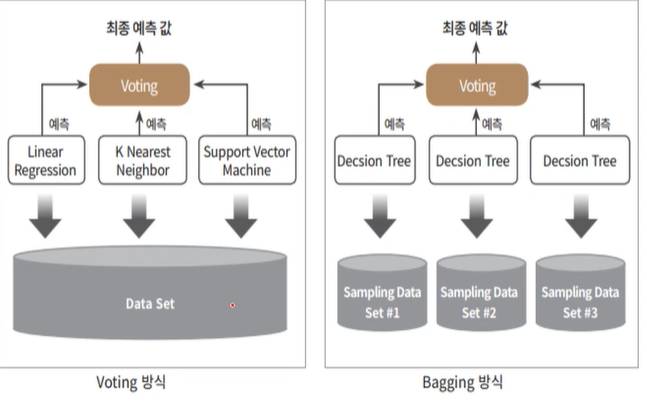

## 보팅 유형 - 하드 보팅과 소프트 보팅
---
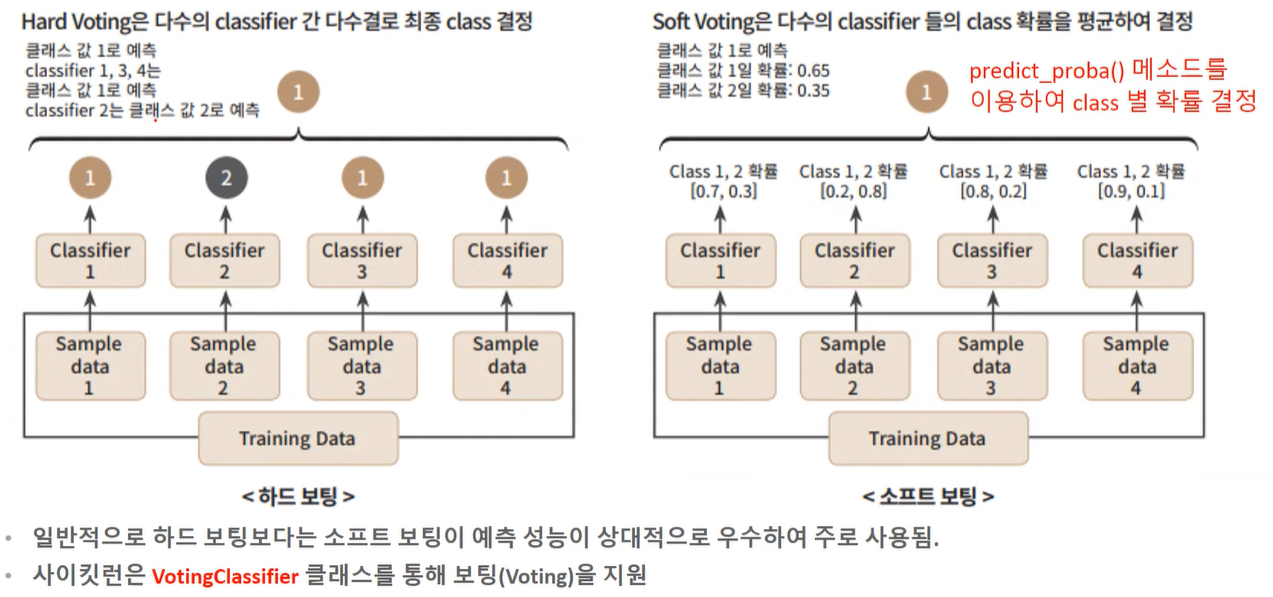

**Voting Classifier**
---
**위스콘신 유방암 데이터 로드**

In [1]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head(3)



,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


**votingCLassifier로 개별 모델은 로지스틱 회귀와 KNN을 보팅방식으로 결합하고 성능 비교**

In [3]:
# 개별 모델은 로지스틱 회귀와 KNN 임. 
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors=8)

# 개별 모델을 소프트 보팅 기반의 앙ㅅ당블 모델로 구현한 분류기
vo_clf = VotingClassifier(estimators= [('LR',lr_clf),('KNN',knn_clf)],voting = 'soft')

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                    test_size=0.2 , random_state= 156)

# VotingClassifier 학습/예측/평가. 
vo_clf.fit(X_train , y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

# 개별 모델의 학습/예측/평가.
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train , y_train)
    pred = classifier.predict(X_test)
    class_name= classifier.__class__.__name__
    print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test , pred)))

Voting 분류기 정확도: 0.9561
LogisticRegression 정확도: 0.9474
KNeighborsClassifier 정확도: 0.9386


C:\Users\67416\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\67416\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
